In [21]:
# kategorisel veriler fazlaysa decision treeye göre random forest daha iyi bir seçenek olabilir. 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score 

In [22]:
df = pd.read_csv("../dataset/LoanApprovalPrediction.csv")
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [23]:
df= df.drop("Loan_ID", axis=1)
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [24]:
df.columns[df.isna().any()]

Index(['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [26]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(2)

In [27]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [28]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [29]:
df = pd.get_dummies(df, dtype=int, columns=["Gender", "Married","Education", "Self_Employed", "Property_Area", "Loan_Status"], drop_first=True)
df.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,127.0,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1


In [30]:
y=df["Loan_Status_Y"]
x=df.drop("Loan_Status_Y", axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, train_size=0.75)

In [32]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=20)
model = forest.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
skorlar = cross_val_score(forest, x, y, cv=10)
print(f"skorlar: {skorlar}")
print(f"skorlar ortalaması: {skorlar.mean()}")

skorlar: [0.8        0.81666667 0.75       0.78333333 0.76666667 0.8
 0.86666667 0.83333333 0.79661017 0.83050847]
skorlar ortalaması: 0.8043785310734464


In [34]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 20  27]
 [  0 103]]


In [35]:
# sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        47
           1       0.79      1.00      0.88       103

    accuracy                           0.82       150
   macro avg       0.90      0.71      0.74       150
weighted avg       0.86      0.82      0.79       150



In [36]:
accuracy_score(y_pred, y_test)

0.82

In [37]:
# pozitif sonuç doğruluğu
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.7923076923076923


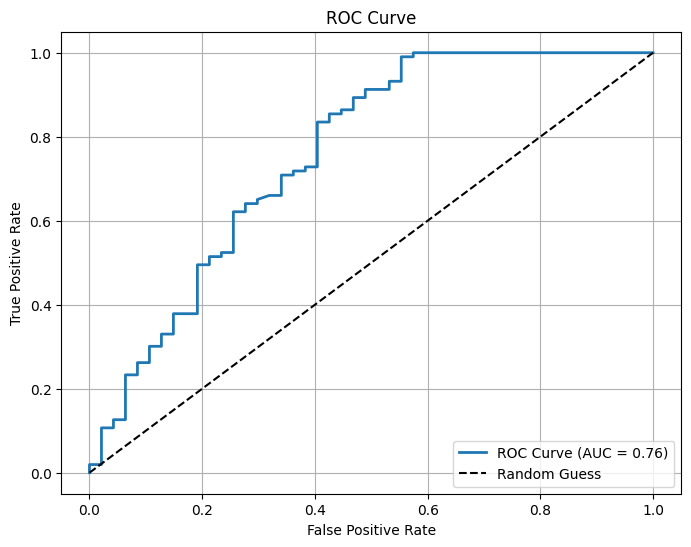

AUC Değeri: 0.76


In [38]:
# Tahmin edilen olasılıkları elde ediyoruz (pozitif sınıf için olasılıklar çünkü ROC eğrisi poztf sınıf performansı ölçmek için rasarlanmıştır)
y_scores = model.predict_proba(x_test)[:, 1] # [:, 1] çünkü negatif ve positif [0.3, 0.7] bize 0.7 lazım pozitif

# ROC ve AUC hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC Değeri Yazdırma
print(f"AUC Değeri: {roc_auc:.2f}")


In [39]:
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

FPR: [0.         0.         0.         0.0212766  0.0212766  0.0212766
 0.04255319 0.04255319 0.06382979 0.06382979 0.08510638 0.08510638
 0.10638298 0.10638298 0.12765957 0.12765957 0.14893617 0.14893617
 0.19148936 0.19148936 0.21276596 0.21276596 0.23404255 0.23404255
 0.25531915 0.25531915 0.27659574 0.27659574 0.29787234 0.29787234
 0.31914894 0.34042553 0.34042553 0.36170213 0.36170213 0.38297872
 0.38297872 0.40425532 0.40425532 0.42553191 0.42553191 0.44680851
 0.44680851 0.46808511 0.46808511 0.4893617  0.4893617  0.53191489
 0.53191489 0.55319149 0.55319149 0.57446809 0.57446809 0.89361702
 0.93617021 1.        ]
TPR: [0.         0.00970874 0.01941748 0.01941748 0.03883495 0.10679612
 0.10679612 0.12621359 0.12621359 0.23300971 0.23300971 0.26213592
 0.26213592 0.30097087 0.30097087 0.33009709 0.33009709 0.37864078
 0.37864078 0.49514563 0.49514563 0.51456311 0.51456311 0.52427184
 0.52427184 0.62135922 0.62135922 0.6407767  0.6407767  0.65048544
 0.66019417 0.66019417 0.7087

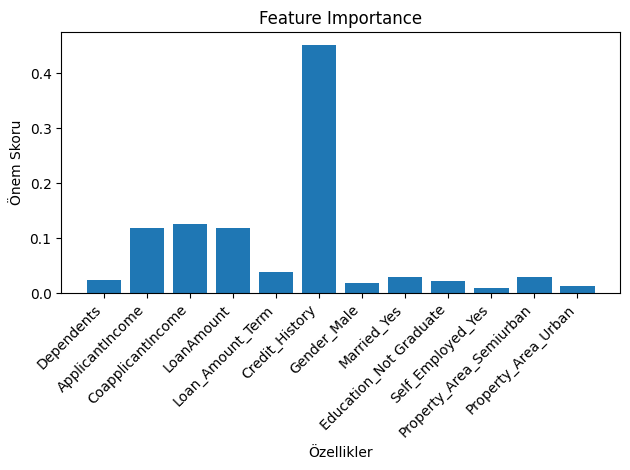

In [40]:
# ÖZELLİKLERİN ÖNEMİ
feature_names = x_train.columns 
importance = model.feature_importances_
plt.bar(feature_names, importance)
plt.xlabel("Özellikler")
plt.ylabel("Önem Skoru")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha="right")  # Özellik isimlerini döndürerek daha okunabilir yap
plt.tight_layout()  # Grafik elemanlarının üst üste binmesini engelle
plt.show()
